# Project: Investigate a Dataset No-Show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The patient makes an appointment with the doctor, receives all instructions and does not attend.

Are no-show linked to a specific gender?

Which hospitals have the most reservation for appointments and which one comes to their appointments the most?

Does SMS reminder reduce absences?

Does the period between the appointed day and the appointment day affect the number of no-show appointments?

Does Scholarship reminder increase the number of absences?

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [6]:
# Reading dataset and show samples of it
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# Show number of columns and rows
df.shape

(110527, 14)

In [8]:
# Statistic description for the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# info about the nonnull values and dtype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
# function to Convert data type for ScheduledDay and AppointmentDay columns from odject to date
def Convert_date(date):
    return  pd.to_datetime(date, format='%d%b%Y', infer_datetime_format=True).dt.date

df['ScheduledDay'] = Convert_date(df['ScheduledDay'])
df['AppointmentDay']  = Convert_date(df['AppointmentDay'])
# Column for days between Appointment Day and Scheduled Day
df['WaitingDays'] = df['AppointmentDay'] - df['ScheduledDay']

In [11]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2 days
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2 days
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2 days
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0 days
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2 days


## Data Cleaning :

### Rename columns, Drop columns, Seperate dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   PatientId       110527 non-null  float64        
 1   AppointmentID   110527 non-null  int64          
 2   Gender          110527 non-null  object         
 3   ScheduledDay    110527 non-null  object         
 4   AppointmentDay  110527 non-null  object         
 5   Age             110527 non-null  int64          
 6   Neighbourhood   110527 non-null  object         
 7   Scholarship     110527 non-null  int64          
 8   Hipertension    110527 non-null  int64          
 9   Diabetes        110527 non-null  int64          
 10  Alcoholism      110527 non-null  int64          
 11  Handcap         110527 non-null  int64          
 12  SMS_received    110527 non-null  int64          
 13  No-show         110527 non-null  object         
 14  WaitingDays     1105

In [13]:
df.rename(columns={'No-show':'No_show'}, inplace=True)

In [14]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)

In [15]:
df_show = df[df['No_show'] == 'No']
df_noshow = df[df['No_show'] == 'Yes']

<a id='eda'></a>
## Exploratory Data Analysis

### Correlation matrix used to estimate the linear historical relationship between columns .

In [12]:
# Correlation matrix for the df
c = df.corr()
c.style.background_gradient()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


## Research Question 1 : What are characteristics of people who reserve an appointments?

#### Visualizations here show characteristics for people who reserved their appointments such age Alcoholism Diabetes and handcap .. etc .

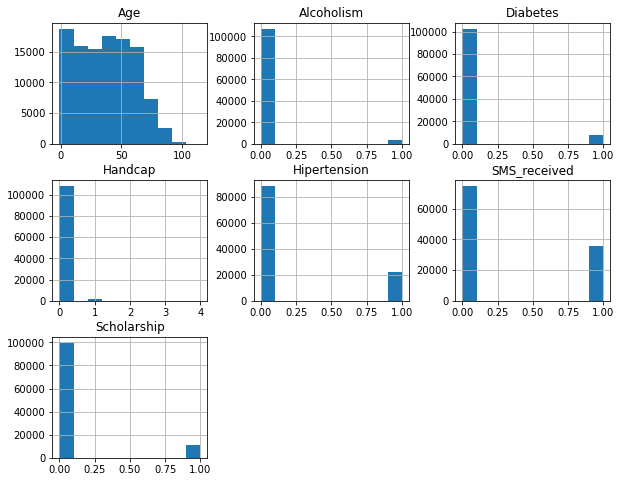

In [13]:
# Histograms for all characteristics for people who reserved an appointments
df.hist(figsize=(10, 8));

#### Visualizations here show characteristics for people who attended their appointments such age Alcoholism Diabetes and handcap .. etc

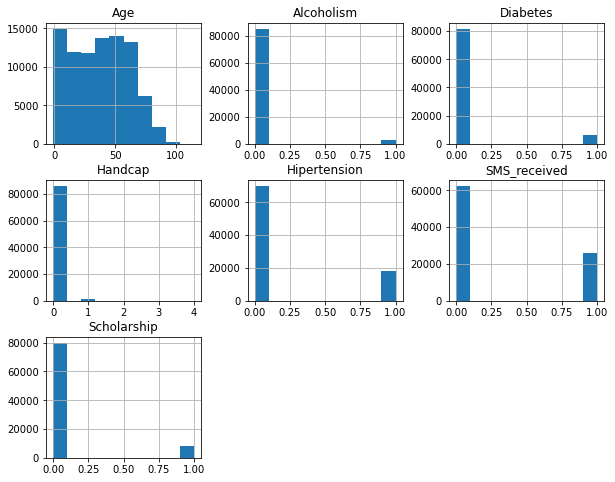

In [14]:
# Histograms for all characteristics for people who attended their reserved appointments
df_show.hist(figsize=(10, 8));

#### Visualizations here show characteristics for people who absented their appointments such age Alcoholism Diabetes and handcap .. etc

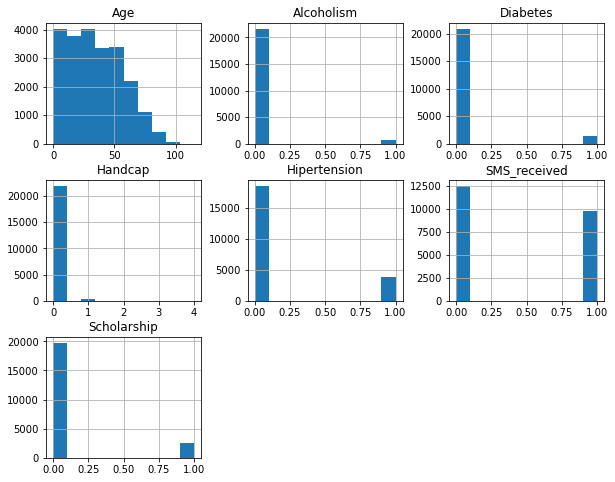

In [15]:
# Histograms for all characteristics for people who didn't attend their reserved appointments
df_noshow.hist(figsize=(10, 8));

### Of course characteristics like SMS_received and Scholarship make some people attend and may in future have high effect in making people attend in their appointments but its seems that it not have ahigh effect .

## Research Question 2 : Ages of people who book an appointment.

#### Visualizations here show most age for reservation between 35 and 40 years old, and mean of these ages is 37

37.08887421173107


Text(0, 0.5, 'Number of people')

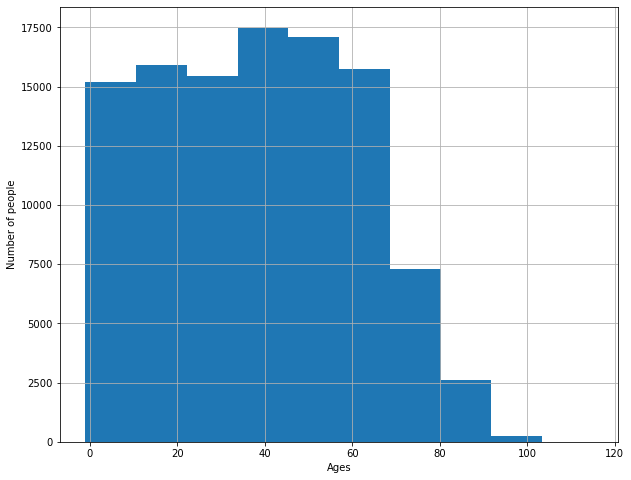

In [16]:
# Ages for all people who reserved an appointments
print(df['Age'].mean())
df['Age'].drop(df.loc[df['Age']==0].index).hist(figsize=(10, 8));
plt.xlabel('Ages')
plt.ylabel('Number of people')

#### Most people attended their appointment are in range 50 years old, and mean of these ages is 38

37.790064393252315


Text(0, 0.5, 'Number of people')

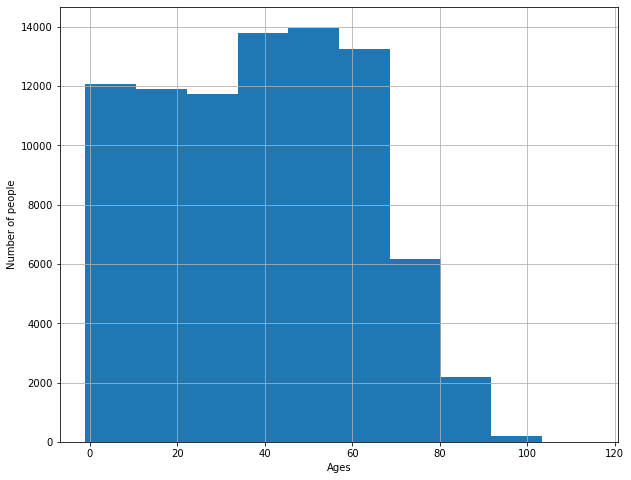

In [17]:
# Ages for people who attended their reserved appointments
print(df_show['Age'].mean())
df_show['Age'].drop(df_show.loc[df_show['Age']==0].index).hist(figsize=(10, 8));
plt.xlabel('Ages')
plt.ylabel('Number of people')


#### Most people absented their appointment are in range 50 years old, and mean of these ages is 30

34.31766656212196


Text(0, 0.5, 'Number of people')

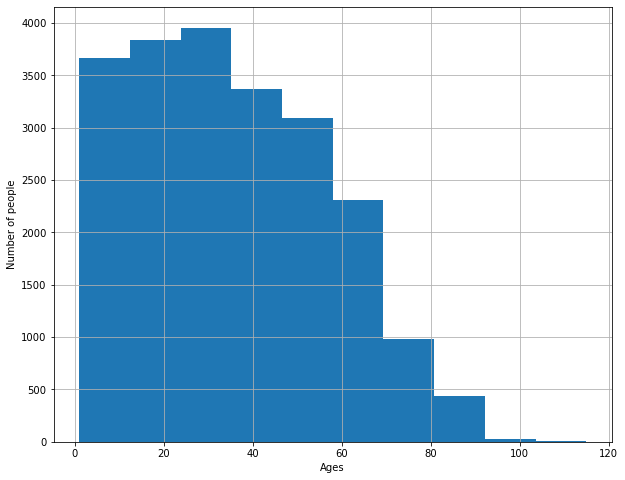

In [18]:
# Ages for people who didn't attend their reserved appointments
print(df_noshow['Age'].mean())
df_noshow['Age'].drop(df_noshow.loc[df_noshow['Age']==0].index).hist(figsize=(10, 8));
plt.xlabel('Ages')
plt.ylabel('Number of people')

### people at age nearly 40 are the most in reserving appointments, And in age nearly 50 are the most in attending their appointments, And in age nearly 25 are the most in absenting their appointments .

## Research Question 3 : Hospitals where appointments are reserved.

#### Visualization here shows that there are prefered hosbitals for reservation like JARDIM CAMBURI(it's the most) and also for attended more than 6000 person attended and lower than 1500 person absented.

In [19]:
# Hospital reserved from highest to lowest 
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

#### Next Visualization shows the highest 15 hospitals of attendence

Text(0, 0.5, 'Number of people')

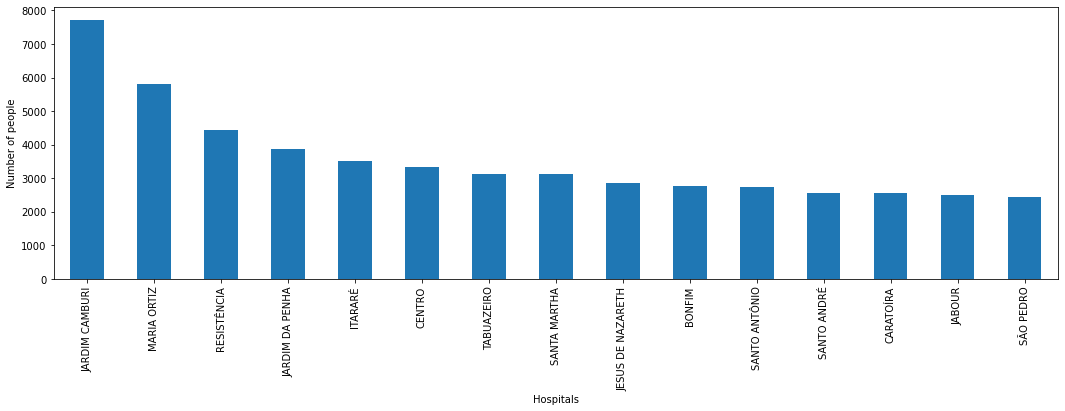

In [20]:
# Hospital reserved from highest to lowest in bar chart
plt.subplots(figsize=(18,5))
df['Neighbourhood'].value_counts().head(15).plot(kind='bar')
plt.xlabel('Hospitals')
plt.ylabel('Number of people')

In [21]:
# Hospital reserved and number of attended people from highest to lowest
df_show['Neighbourhood'].value_counts()

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64

Text(0, 0.5, 'Number of people')

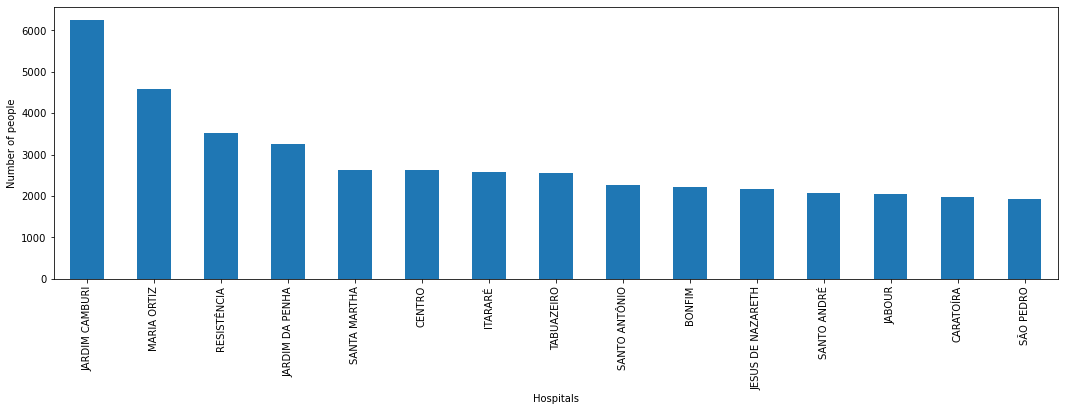

In [22]:
# Hospital reserved and number of attended people from highest to lowest in bar chart
plt.subplots(figsize=(18,5))
df_show['Neighbourhood'].value_counts().head(15).plot(kind='bar')
plt.xlabel('Hospitals')
plt.ylabel('Number of people')

In [23]:
# Hospital reserved and number of absented people from highest to lowest
df_noshow['Neighbourhood'].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHA DO FRADE                     2
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

#### Next Visualization shows the highest 15 hospitals of absetence

Text(0, 0.5, 'Number of people')

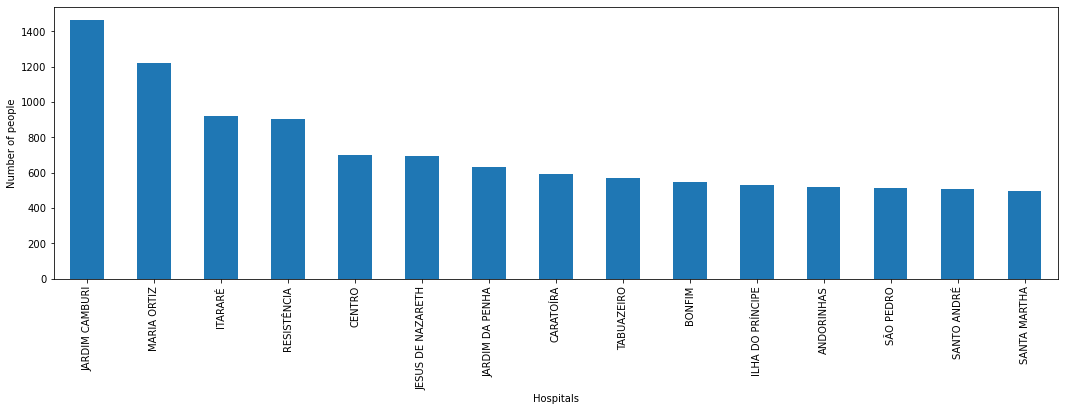

In [24]:
# Hospital reserved and number of absented people from highest to lowest in bar chart
plt.subplots(figsize=(18,5))
df_noshow['Neighbourhood'].value_counts().head(15).plot(kind='bar')
plt.xlabel('Hospitals')
plt.ylabel('Number of people')

#### This visuliaztion shows how is the diference in each hospital between attending and absenting for reserved appointment .

## Research Question 4 : The gender of people who book appointments.
#### Visulization shows that most people reserved attended at their appointment and females were the most interest in reserving appointment.

Text(0, 0.5, 'Number of people')

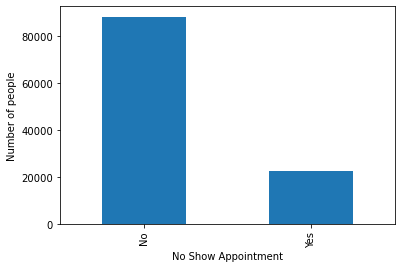

In [26]:
# Bar chart shows the number of people who attended and didn't attend
df['No_show'].value_counts().plot.bar()
plt.xlabel('No Show Appointment')
plt.ylabel('Number of people')

### Most who reserved attended in their appointments

In [27]:
df[df['Gender']=='F']['Gender'].value_counts()

F    71840
Name: Gender, dtype: int64

In [28]:
df_show[df_show['Gender']=='F']['Gender'].value_counts()

F    57246
Name: Gender, dtype: int64

In [29]:
df_show[df_show['Gender']=='M']['Gender'].value_counts()

M    30962
Name: Gender, dtype: int64

In [30]:
df_noshow[df_noshow['Gender']=='F']['Gender'].value_counts()

F    14594
Name: Gender, dtype: int64

In [31]:
df_noshow[df_noshow['Gender']=='M']['Gender'].value_counts()

M    7725
Name: Gender, dtype: int64

### Females are the most of people reserve and the most of attendance and absence

#### Visualization here shows that more than 55000 Females attend and less than 15000 absence

Text(0, 0.5, 'Number of people')

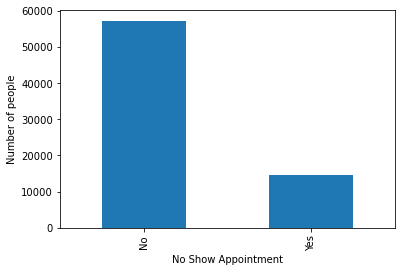

In [32]:
# Bar chart shows the number of Females who attended and didn't attend
df[df['Gender']=='F']['No_show'].value_counts().plot.bar()
plt.xlabel('No Show Appointment')
plt.ylabel('Number of people')

#### Visualization here shows that more than 30000 Males attend and less than 8000 absence

Text(0, 0.5, 'Number of people')

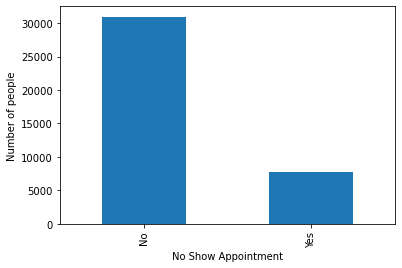

In [33]:
# Bar chart shows the number of Males who attended and didn't attend
df[df['Gender']=='M']['No_show'].value_counts().plot.bar()
plt.xlabel('No Show Appointment')
plt.ylabel('Number of people')

### It's abvoius that females who reserved and attended their appointment are more than females and also in absence .

## Research Question 5 : Days between appointment and schedule time.

#### Visulizations here shows the difference of days between the day of reservation and the day of examination and how it effect in attending and most people prefer to reserve in the same day and big percentage of them attend in their appointments but also they the most who didn't attend but it seems little proprtion.

Text(0, 0.5, 'Number of people')

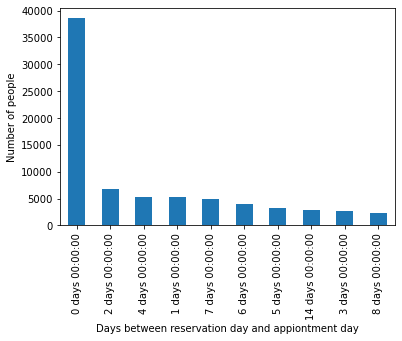

In [34]:
# Bar chart show the difference of days between the day of reservation and the day of examination
df['WaitingDays'].value_counts().head(10).plot.bar()
plt.xlabel('Days between reservation day and appiontment day')
plt.ylabel('Number of people')

### Most people reseve appointment in the same day

Text(0, 0.5, 'Number of people')

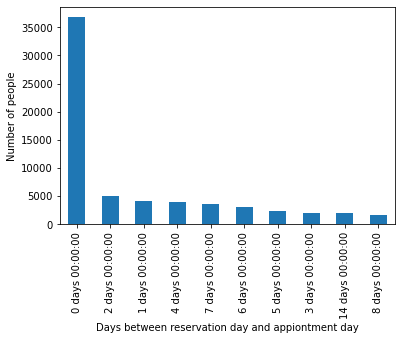

In [35]:
# Bar chart show the difference of days between the day of reservation and the day of examination for people attended at their appointment
df_show['WaitingDays'].value_counts().head(10).plot.bar()
plt.xlabel('Days between reservation day and appiontment day')
plt.ylabel('Number of people')

### it's prefered to attend when reservation day is the same for appointment

Text(0, 0.5, 'Number of people')

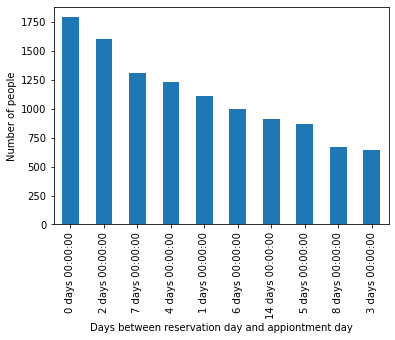

In [36]:
# Bar chart show the difference of days between the day of reservation and the day of examination for people didn't attend at their appointment
df_noshow['WaitingDays'].value_counts().head(10).plot.bar()
plt.xlabel('Days between reservation day and appiontment day')
plt.ylabel('Number of people')

### it's prefered to attend when reservation day is the same for appointment but also it have the high portion in absented but its because there are many people reserve in this case so as a proportion other cases are higher in absenting

## Research Question 6 : The influence of factors such as (Scholarship, SMS_received, Diabetes) on time attendance.

#### Visualizations here shows the percentage of people who received an SMS and didn't attend when compared to people who received an SMS and did not is high .
#### Visualizations here Explains that people enrolled in the scholarship program don't seem to increase the likelihood that people will show up for the appointment ,, and also diabetes are the same .

Text(0.5, 0, 'The ratio between recipients and non-recipients of a message')

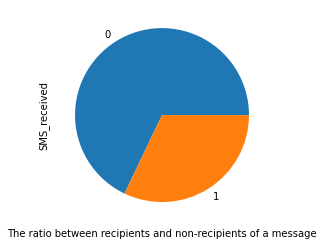

In [37]:
df['SMS_received'].value_counts().plot(kind='pie')
plt.xlabel('The ratio between recipients and non-recipients of a message')

#### it's abvoius that most of people attend didn't receive SMS

Text(0.5, 0, 'The ratio between recipients and non-recipients of a message for show')

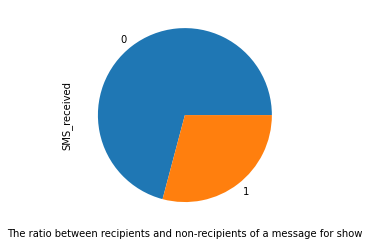

In [38]:
df_show['SMS_received'].value_counts().plot(kind='pie')
plt.xlabel('The ratio between recipients and non-recipients of a message for show')

#### it's abvoius that most of people absent didn't receive SMS

Text(0.5, 0, 'The ratio between recipients and non-recipients of a message for non show')

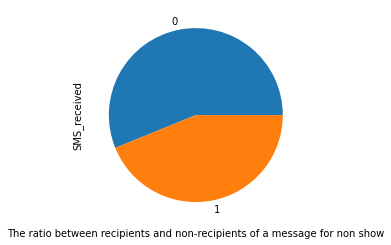

In [39]:
df_noshow['SMS_received'].value_counts().plot(kind='pie')
plt.xlabel('The ratio between recipients and non-recipients of a message for non show')

#### Number of people who has scholarship nearly 100000 and less than 12000 who didn't have

Text(0, 0.5, 'Number of people')

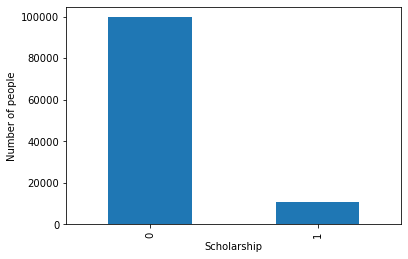

In [40]:
df['Scholarship'].value_counts().plot(kind='bar')
plt.xlabel('Scholarship')
plt.ylabel('Number of people')

#### Number of people who has scholarship and attended nearly 80000 and less than 9000 who didn't have

Text(0, 0.5, 'Number of people')

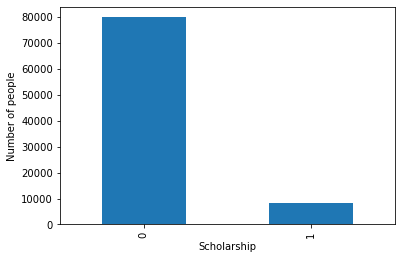

In [41]:
df_show['Scholarship'].value_counts().plot(kind='bar')
plt.xlabel('Scholarship')
plt.ylabel('Number of people')

#### Number of people who has scholarship and didn't attend nearly 19000 and less than 2500 who didn't have

Text(0, 0.5, 'Number of people')

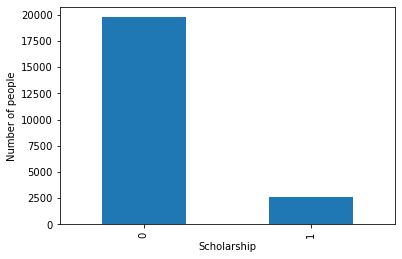

In [42]:
df_noshow['Scholarship'].value_counts().plot(kind='bar')
plt.xlabel('Scholarship')
plt.ylabel('Number of people')

#### Visualization shows that most people reserve have diabetes

Text(0, 0.5, 'Number of people')

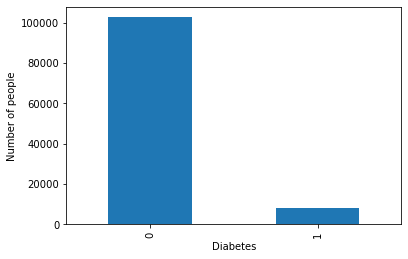

In [43]:
df['Diabetes'].value_counts().plot(kind='bar');
plt.xlabel('Diabetes')
plt.ylabel('Number of people')

#### Diabetes Realtionship bar betwwn eho ettend and absent

Text(0, 0.5, 'Number of people')

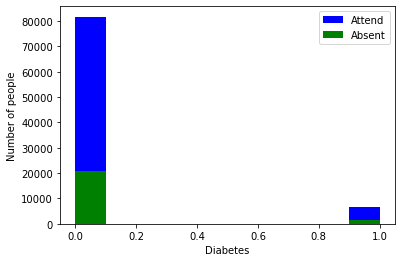

In [44]:
plt.hist(df_show.Diabetes, facecolor='b',alpha=1, label='Attend')
plt.hist(df_noshow.Diabetes, facecolor='g',alpha=1, label='Absent')
plt.legend()
plt.xlabel('Diabetes')
plt.ylabel('Number of people')

### Of course characteristics like SMS_received, diabetesand Scholarship make some people attend and may in future have high effect in making people attend in their appointments but its seems that it not have ahigh effect .

<a id='conclusions'></a>
## Conclusions

### My Analysis show that :

Totaly therer is no limitations just some samples have age of 0 that's not accepted but i handled it.

Characteristics for people who reserved, attended and absented their  appointments.

Most People reserve appointment are between 35 and 40 years old, who attend are also between 35 and 40 years old, who attend are between 30 and 35 years old.

There are prefered hosbitals for reservation like JARDIM CAMBURI(it's the most) and also for attended more than 6000 person attended and lower than 1500 person absented.

Shows that most people reserve attend at their appointment and females are the most interest in reserving appointment.

Shows the difference of days between the day of reservation and the day of examination and how it effect in attending and most people prefer to reserve in the same day and also they the most who didn't attend but it seems little proprtion.

Shows the percentage of people who received an SMS and didn't attend when compared to people who received an SMS and did not is high .

Explains that people enrolled in the scholarship program don't seem to increase the likelihood that people will show up for the appointment.

In [45]:
df.to_csv('No_show_appointment_edited.csv',index=False)